In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_dir = "/home/angps/Documents/Thesis/Data/"
image_dir = "/home/angps/Documents/Thesis/Report/Images/"

In [2]:
df_atleast_50_cts = pd.read_csv(data_dir + 'data_>=50cts.csv')
full_df = pd.read_csv(data_dir + 'df_>=1cts.csv')

**Heatmap**

In [3]:
df_atleast_50_cts.head()

,1,2,3,4,5,6,7,8,9,10,...,195,196,197,198,199,200,201,202,203,204
0,0,1,5,3,1,1,1,4,6,2,...,7,0,1,1,2,1,2,1,1,1
1,1,2,3,0,3,0,1,2,4,2,...,0,0,2,0,0,0,0,0,1,0
2,0,0,2,5,1,0,0,4,4,0,...,2,1,0,0,1,0,1,1,0,0
3,0,2,7,5,4,0,4,4,4,2,...,2,0,0,1,3,0,5,1,0,0
4,0,0,1,6,0,0,1,3,3,1,...,0,1,0,0,1,0,3,0,0,0


In [16]:
cluster = pd.read_csv(data_dir + 'cluster_df.csv')
cluster = cluster.iloc[:,1:]

In [17]:
cluster.shape

(204, 9)

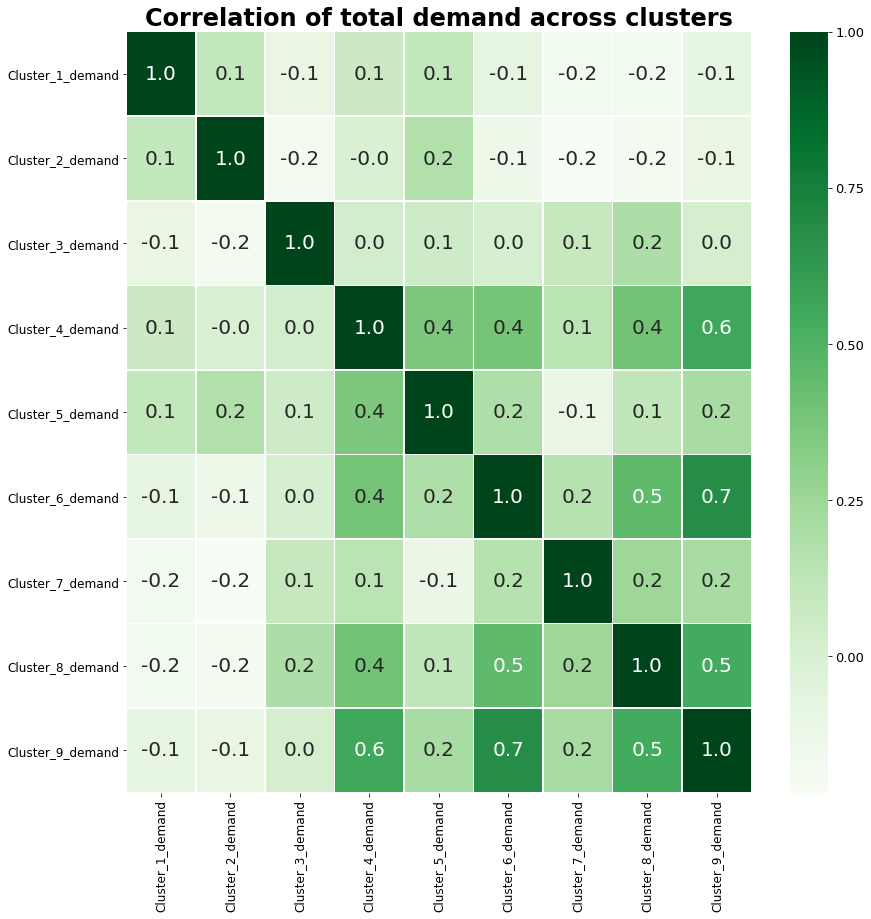

In [25]:
import seaborn as sns
f,ax = plt.subplots(figsize=(14,14))
sns.heatmap(cluster.corr(), annot=True, linewidths=0.5, fmt= '.1f',ax=ax,cmap="Greens",annot_kws = {"size" : 20})
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=13)
ax.tick_params(labelsize=12)
ax.set_title('Correlation of total demand across clusters',fontsize=24, fontweight='bold')
plt.savefig(image_dir + 'cluster_corr_heatmap.jpg')

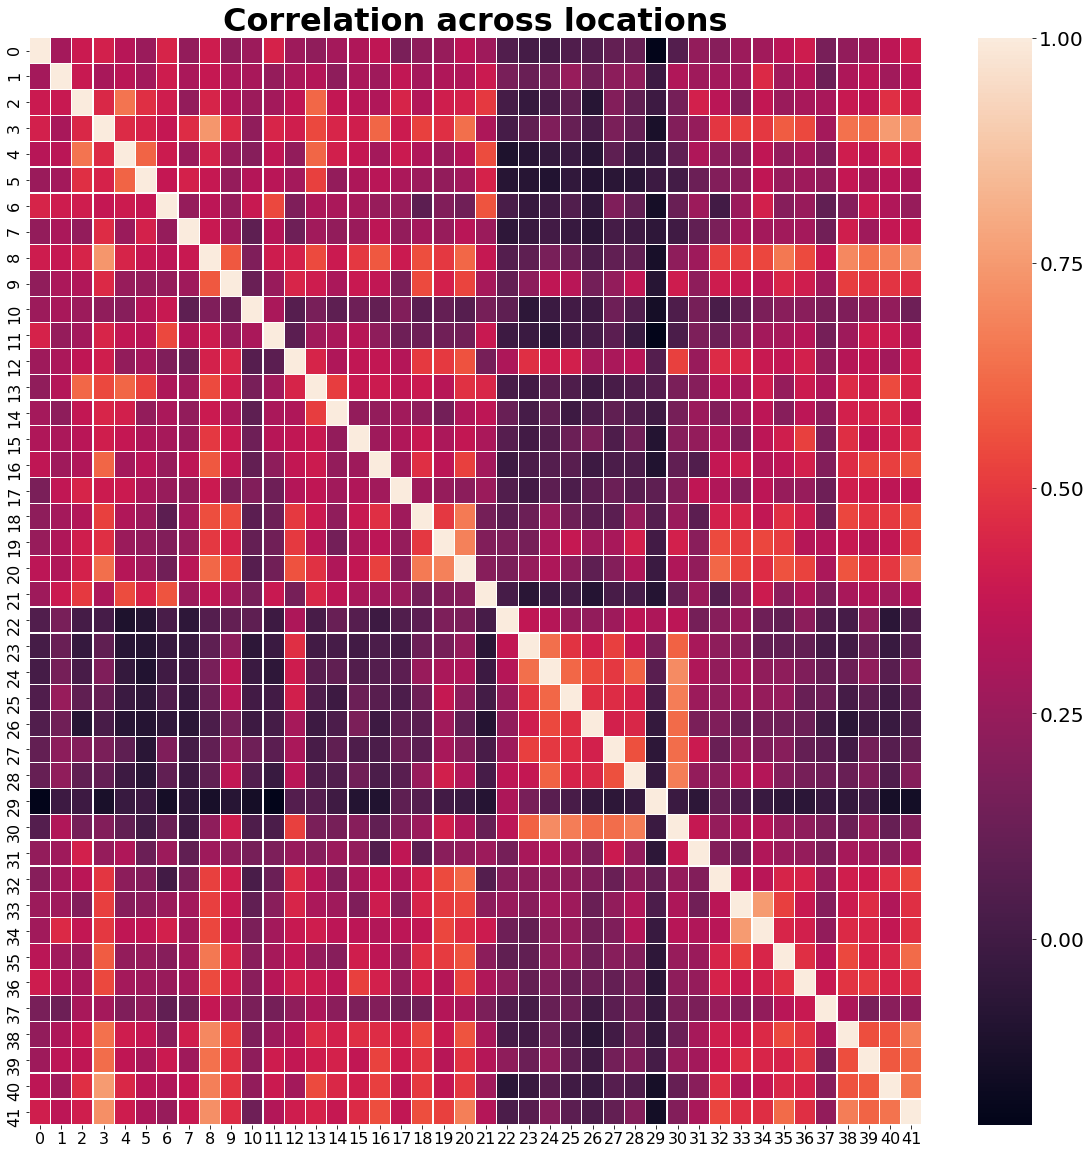

In [13]:
import seaborn as sns
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_atleast_50_cts.T.corr(), linewidths=0.2, ax=ax)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)
ax.tick_params(labelsize=16)
ax.set_title('Correlation across locations',fontsize=32, fontweight='bold')
plt.savefig(image_dir + 'heatmap.jpg')

## **1. Baseline Model**

### **1.1 Subsetting data with at least 50 counts**

In [3]:
# min_count = 50
# df_atleast_50_cts = loc_time_demand_df[(loc_time_demand_df > 0).sum(axis=1) >= min_count].reset_index(drop=True)

In [4]:
df_atleast_50_cts.head()

,1,2,3,4,5,6,7,8,9,10,...,195,196,197,198,199,200,201,202,203,204
0,0,1,5,3,1,1,1,4,6,2,...,7,0,1,1,2,1,2,1,1,1
1,1,2,3,0,3,0,1,2,4,2,...,0,0,2,0,0,0,0,0,1,0
2,0,0,2,5,1,0,0,4,4,0,...,2,1,0,0,1,0,1,1,0,0
3,0,2,7,5,4,0,4,4,4,2,...,2,0,0,1,3,0,5,1,0,0
4,0,0,1,6,0,0,1,3,3,1,...,0,1,0,0,1,0,3,0,0,0


In [3]:
full_df.shape

(713, 204)

### **1.2 Mean Demand of sample individual location (>= 50 non-zero counts) across days**

Text(0.5, 1.0, 'Mean Demand of location 0')

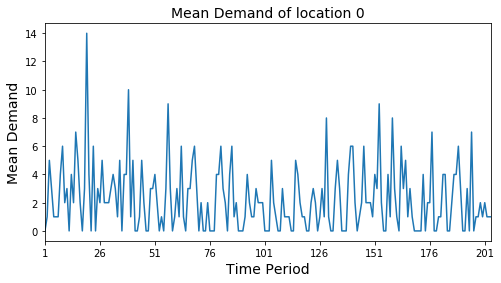

In [6]:
mean_demand_0 = df_atleast_50_cts.iloc[0,:]
mean_demand_0.plot(figsize=(8,4))
plt.xlabel("Time Period", fontsize = 14)
plt.ylabel("Mean Demand", fontsize = 14)
plt.title("Mean Demand of location 0", fontsize = 14)

Text(0.5, 1.0, 'Mean Demand of location 24')

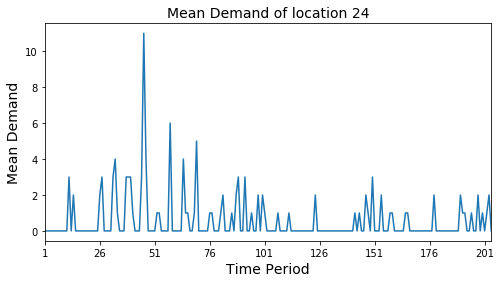

In [7]:
mean_demand_24 = df_atleast_50_cts.iloc[24,:]
mean_demand_24.plot(figsize=(8,4))
plt.xlabel("Time Period", fontsize = 14)
plt.ylabel("Mean Demand", fontsize = 14)
plt.title("Mean Demand of location 24", fontsize = 14)

### **1.3 Mean Demand of locations (>= 50 non-zero counts) across days**

Text(0.5, 1.0, 'Mean Demand of locations (>= 50 non-zero counts) across days')

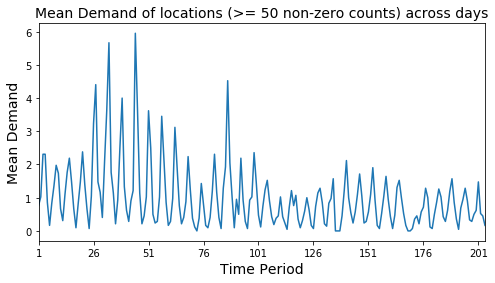

In [10]:
mean_demand_all = df_atleast_50_cts.mean()
mean_demand_all.plot(figsize=(8,4))
plt.xlabel("Time Period", fontsize = 14)
plt.ylabel("Mean Demand", fontsize = 14)
plt.title("Mean Demand of locations (>= 50 non-zero counts) across days", fontsize = 14)

### **1.4 Applying ARIMA on the 42 locations (>= 50 non-zero counts)**

**Splitting training and test set**

We will use the first 33 days as the training set and the last 1 as test set

In [4]:
from statsmodels.tools.eval_measures import rmse, aic
from pmdarima.arima import auto_arima
train_df = df_atleast_50_cts.iloc[:, 0:198]
test_df = df_atleast_50_cts.iloc[:, 198:]
train_full = full_df.iloc[:, 0:198]
test_full = full_df.iloc[:, 198:]

/home/angps/anaconda3/envs/deeplearning2/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/angps/anaconda3/envs/deeplearning2/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:

def fit_arima_get_rmse(train, test):
    model = auto_arima(train, trace=False, error_action='ignore', suppress_warnings=True)
    model.fit(train)
    forecast = model.predict(n_periods=len(test))
    mse = rmse(test, forecast)
    return mse

def fit_arima(train, test):
    model = auto_arima(train, trace=False, error_action='ignore', suppress_warnings=True)
    model.fit(train)
    forecast = model.predict(n_periods=len(test))
    return forecast

# def fit_arima(train, test):
#     model = auto_arima(train, trace=False, error_action='ignore', suppress_warnings=True)
#     model.fit(train)
#     forecast = model.predict(n_periods=len(test))
#     return model.resid(), model.predict_in_sample(), forecast

def compute_errors(pred, act):
    err = np.square(np.subtract(pred, act)).sum()
    return err
    

**ARIMA baseline for locations > 50 non-zero counts**

In [6]:
loss = []
fitted = []
SFE = 0
for i in range(len(train_df)):
    train = train_df.iloc[i,:]
    test = test_df.iloc[i,:]
    forecast = fit_arima(train, test)
    #resid, fitval, forecast = fit_arima(train, train)
    loss.extend(forecast-test.values)
    #loss.extend(resid)
    #fitted.extend(fitval)
    forecast_err = compute_errors(forecast, test)
    #forecast_err = compute_errors(forecast, train)
    SFE += forecast_err
print("MSFE for baseline ARIMA model on subset of dataset: " + str(round(SFE/6, 3)))
#print("MSFE for baseline ARIMA model on subset of dataset: " + str(round(SFE/162, 3)))

MSFE for baseline ARIMA model on subset of dataset: 47.599


In [7]:
len(loss)

252

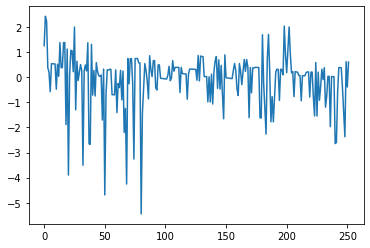

In [8]:
plt.plot(loss)

ValueError: x and y must be the same size

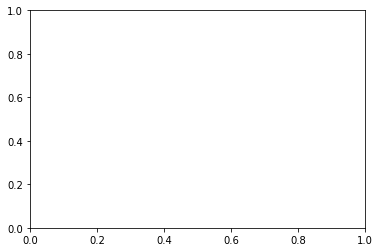

In [9]:
plt.scatter(fitted, loss)

In [27]:
model = auto_arima(train_df.iloc[15,:], trace=False, error_action='ignore', suppress_warnings=True)

In [17]:
plt.plot(model.resid())

NameError: name 'model' is not defined

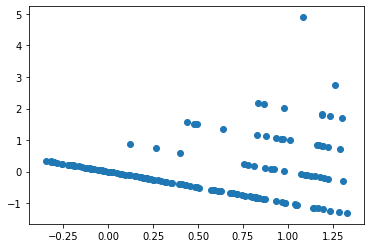

In [29]:
plt.scatter(model.predict_in_sample(),model.resid())

<function pmdarima.arima.arima.ARIMA.resid(self)>

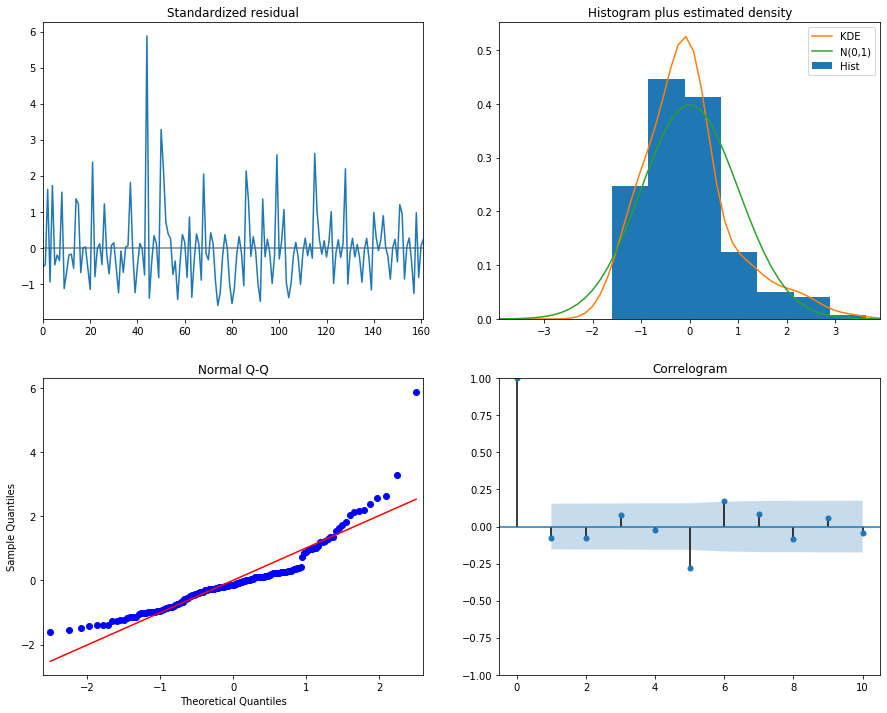

In [30]:
model.plot_diagnostics(figsize=(15, 12))
model.resid

**ARIMA baseline for full dataset**

In [10]:
train_full.shape

(713, 198)

In [11]:
loss = []
SFE = 0
for i in range(len(train_full)):
    train = train_full.iloc[i,:]
    test = test_full.iloc[i,:]
    #err = fit_arima_get_rmse(train, test)
    #loss.append(err)
    forecast = fit_arima(train, test)
    forecast_err = compute_errors(forecast, test)
    SFE += forecast_err
#print("RMSE for baseline ARIMA model: " + str(np.mean(loss)))
print("MSFE for baseline ARIMA model on full dataset: " + str(round(SFE/6, 3)))

MSFE for baseline ARIMA model on full dataset: 72.476


In [13]:
trg = train_df.iloc[6,:]
tst = test_df.iloc[6,:]

In [14]:
model = auto_arima(trg, trace=False, error_action='ignore', suppress_warnings=True, seasonal=False)
model.fit(trg)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(5, 1, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend=None, with_intercept=True)

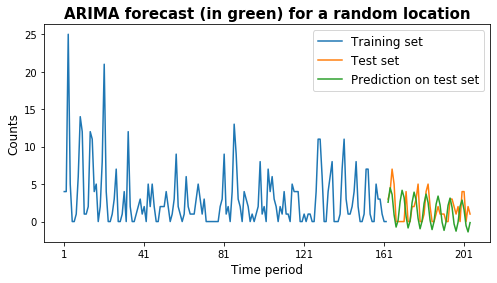

In [15]:
forecast = model.predict(n_periods=len(tst))
forecast = pd.DataFrame(forecast,index = tst.index,columns=['Prediction'])

#plot the predictions for validation set
plt.figure(figsize = (8,4))
plt.plot(trg, label='Training set')
plt.plot(tst, label='Test set')
plt.plot(forecast, label='Prediction on test set')
plt.legend(fontsize=12)
plt.xlabel("Time period",fontsize=12)
plt.ylabel("Counts",fontsize=12)
plt.xticks(range(0,204,40))
plt.title("ARIMA forecast (in green) for a random location", fontsize=15, fontweight = 'bold')
#plt.show()
plt.savefig(image_dir + 'forecast_example.jpg')

In [33]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
coint_johansen(full_df,1,1)

/home/angps/anaconda3/envs/deeplearning2/lib/python3.7/site-packages/statsmodels/tsa/vector_ar/vecm.py:609: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  category=HypothesisTestWarning)


LinAlgError: Singular matrix

In [29]:
full_df.shape

(839, 204)

## **4. VAR Model**

In [16]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.statespace.varmax import VARMAX

In [17]:
train_df_mat = train_df.to_numpy()
train_df_mat

array([[ 0,  1,  5, ...,  3,  1,  0],
       [ 1,  2,  3, ...,  3,  2,  0],
       [ 0,  0,  2, ...,  0,  0,  0],
       ...,
       [ 1,  1,  2, ...,  0,  0,  0],
       [ 0,  3,  2, ...,  0,  0,  0],
       [ 0, 10,  6, ...,  0,  0,  0]])

In [18]:
train_df.shape

(42, 162)

In [19]:
train_df_1 = train_df.diff(axis=1).dropna(axis=1)
train_df_1.shape

(42, 161)

In [20]:
test_df_1 = test_df.diff(axis=1).dropna(axis=1)
test_df_1.shape

(42, 41)

In [21]:
test_df_1.values

array([[-3.,  2., -4., ..., -1.,  0.,  0.],
       [ 6., -4.,  1., ...,  0.,  1., -1.],
       [ 2.,  3., -4., ...,  0., -1.,  0.],
       ...,
       [ 0., -1.,  0., ..., -2.,  0.,  0.],
       [ 1., -1., -1., ..., -1.,  0.,  0.],
       [ 2.,  0., -2., ..., -3.,  1., -1.]])

In [22]:
train_df.T.iloc[[-1]]

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
162,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test_df_1.head()

,164,165,166,167,168,169,170,171,172,173,...,195,196,197,198,199,200,201,202,203,204
0,-3.0,2.0,-4.0,2.0,-2.0,-1.0,0.0,0.0,0.0,4.0,...,7.0,-7.0,1.0,0.0,1.0,-1.0,1.0,-1.0,0.0,0.0
1,6.0,-4.0,1.0,-2.0,0.0,-1.0,0.0,0.0,1.0,-1.0,...,0.0,0.0,2.0,-2.0,0.0,0.0,0.0,0.0,1.0,-1.0
2,2.0,3.0,-4.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,-1.0,0.0,1.0,-1.0,1.0,0.0,-1.0,0.0
3,-1.0,6.0,-5.0,-2.0,2.0,-2.0,0.0,0.0,1.0,-1.0,...,-2.0,-2.0,0.0,1.0,2.0,-3.0,5.0,-4.0,-1.0,0.0
4,0.0,4.0,-4.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,1.0,-1.0,0.0,1.0,-1.0,3.0,-3.0,0.0,0.0


In [24]:
test_df.head()

,163,164,165,166,167,168,169,170,171,172,...,195,196,197,198,199,200,201,202,203,204
0,6,3,5,1,3,1,0,0,0,0,...,7,0,1,1,2,1,2,1,1,1
1,0,6,2,3,1,1,0,0,0,1,...,0,0,2,0,0,0,0,0,1,0
2,0,2,5,1,0,0,0,0,0,0,...,2,1,0,0,1,0,1,1,0,0
3,2,1,7,2,0,2,0,0,0,1,...,2,0,0,1,3,0,5,1,0,0
4,0,0,4,0,1,0,0,0,0,0,...,0,1,0,0,1,0,3,0,0,0


In [25]:
train_df.T.values[-1:].shape

(1, 42)

In [26]:
model = VAR(endog=train_df.T.reset_index(drop=True))
model_var = model.fit(1)
model_var.forecast(train_df.T.values[-1:], steps = 10).T.shape

(42, 10)

In [27]:
print("Average MSFE for each lag")
for o in range(1,25):
    model = VAR(endog=train_df.T.reset_index(drop=True))
    model_var = model.fit(o)
    errors = []
    SFE = 0
    yhat = model_var.forecast(train_df.T.values[-o:], steps=len(test_df)).T
    for i in range(len(test_df)):
       
        error = compute_errors(test_df.iloc[i,:], yhat[i])
        SFE += error
        errors.append(error)
    print("Lag " + str(o) + ": " , round(SFE/42,3))
    

Average MSFE for each lag
Lag 1:  68.776
Lag 2:  65.902
Lag 3:  109.368
Lag 4:  8160.497
Lag 5:  1236.279
Lag 6:  300.644
Lag 7:  222.166
Lag 8:  184.344
Lag 9:  201.702
Lag 10:  137.758
Lag 11:  106.074
Lag 12:  89.84
Lag 13:  82.774
Lag 14:  83.814
Lag 15:  78.53
Lag 16:  76.645
Lag 17:  78.165
Lag 18:  75.35
Lag 19:  76.389
Lag 20:  74.45
Lag 21:  75.624
Lag 22:  76.662
Lag 23:  71.322
Lag 24:  69.128


In [28]:
len(test_df)

42